## Assessment 2: Churn Prediction
Can you predict whether a customer will churn or not?


**Understanding Problem Statement:**

Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.


### Step 1: Data Inspection

In [454]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [455]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [456]:
# Importing all datasets
data = pd.read_csv("train_PDjVQMB.csv")
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [457]:
# Let's check the dimensions of the dataframe
data.shape

(6650, 11)

In [458]:
# let's look at the statistical aspects of the dataframe
data.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [459]:
# Let's see the type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


### Steps 2: Data Cleaning

In [460]:
data.Is_Churn.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [461]:
# checking null values
100*(data.isnull().sum()/len(data.index))

ID                    0.0
Age                   0.0
Gender                0.0
Income                0.0
Balance               0.0
Vintage               0.0
Transaction_Status    0.0
Product_Holdings      0.0
Credit_Card           0.0
Credit_Category       0.0
Is_Churn              0.0
dtype: float64

**Data doesn' have any null values.**

### Univariate and Bivariate Analysis

In [462]:
data.Age.describe()

count    6650.000000
mean       41.130226
std         9.685747
min        21.000000
25%        34.000000
50%        40.000000
75%        47.000000
max        72.000000
Name: Age, dtype: float64

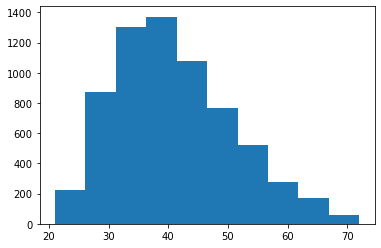

In [463]:
#Create a histogram of the Reviews
plt.hist(data.Age)
plt.show()

**Maximum customers lie in the range from 30-45**

<AxesSubplot:xlabel='Age'>

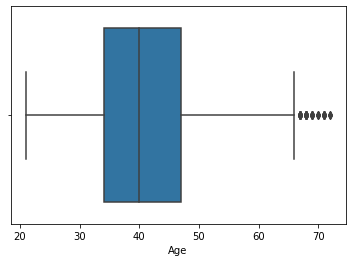

In [464]:
# creating boxplot for checking outliers
sns.boxplot(data.Age)

In [465]:
data[data.Age>65]

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
20,a50f4c3c,66,Female,10L - 15L,750865.14,4,1,2,0,Poor,0
40,487f90af,68,Female,Less than 5L,634975.74,3,0,2,0,Average,1
78,51c1da4d,67,Female,Less than 5L,227871.54,2,1,3+,1,Good,0
160,2320f996,68,Female,Less than 5L,82341.00,1,1,2,1,Good,0
222,7222dd13,67,Male,5L - 10L,892519.56,3,0,2,0,Poor,1
...,...,...,...,...,...,...,...,...,...,...,...
6117,bf9e01cb,66,Female,Less than 5L,586709.28,1,1,2,1,Poor,0
6145,5a9d32bd,70,Male,Less than 5L,1523233.35,0,0,2,1,Good,1
6152,5e9a912c,66,Male,More than 15L,1618418.43,4,0,1,0,Poor,1
6180,8cf7174a,68,Female,Less than 5L,1226006.46,2,1,2,0,Good,1


**Very less customers are of the age above 65. We don't need to treat these as they are harmless for our modelling.**

In [466]:
data.Gender.value_counts()

Male      3612
Female    3038
Name: Gender, dtype: int64

In [467]:
data.Income.value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [468]:
data.Transaction_Status.value_counts()

1    3430
0    3220
Name: Transaction_Status, dtype: int64

In [469]:
data.Credit_Card.value_counts()

1    4418
0    2232
Name: Credit_Card, dtype: int64

In [470]:
data.Credit_Category.value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

In [471]:
data.Product_Holdings.value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

In [472]:
data.Vintage.value_counts()

3    1405
1    1354
2    1328
4    1296
0     956
5     311
Name: Vintage, dtype: int64

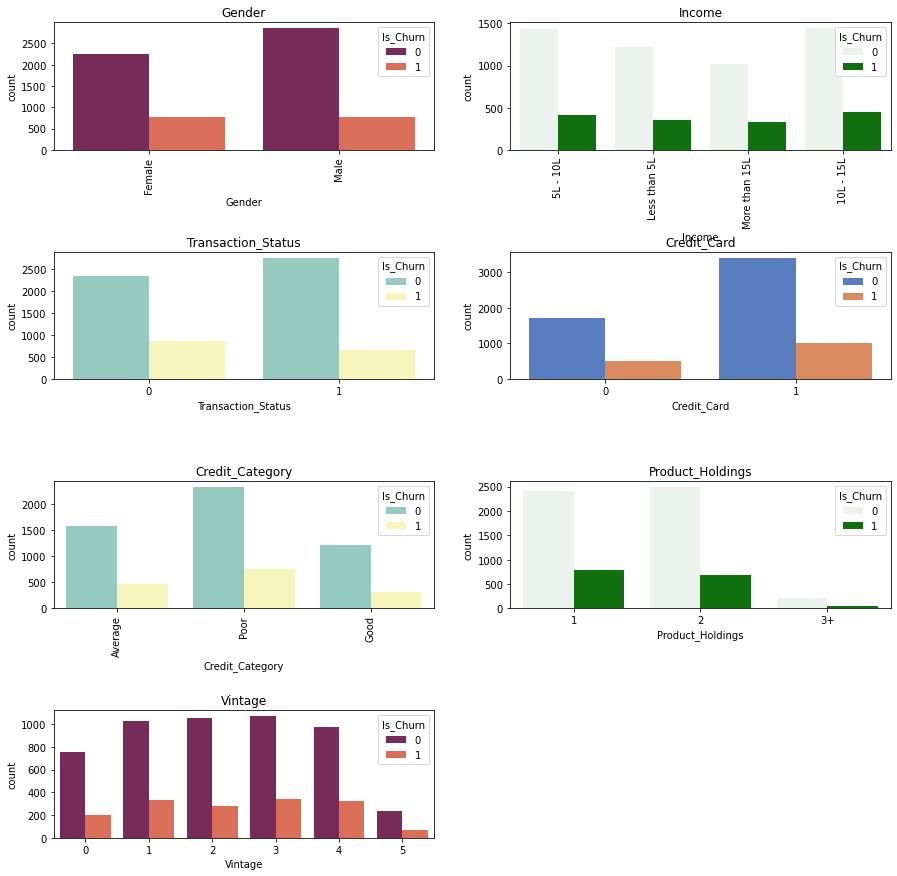

In [473]:
#plotting spread of Categorical columns
fig= plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.8)
ax1=plt.subplot(4, 2, 1)
plt.title('Gender')
s1=sns.countplot(data.Gender, hue=data.Is_Churn, ax=ax1,palette="rocket")
plt.xticks(rotation = 90)


ax2=plt.subplot(4, 2, 2)
plt.title('Income')
s2=sns.countplot(data.Income, hue=data.Is_Churn,ax=ax2,color="Green")
plt.xticks(rotation = 90)


ax3=plt.subplot(4, 2, 3)
plt.title('Transaction_Status')
s3=sns.countplot(data.Transaction_Status, hue=data.Is_Churn,ax=ax3,palette="Set3")


ax4=plt.subplot(4, 2, 4)
plt.title('Credit_Card')
s4=sns.countplot(data.Credit_Card, hue=data.Is_Churn, ax=ax4,palette="muted")


ax5=plt.subplot(4, 2, 5)
plt.title('Credit_Category')
s5=sns.countplot(data.Credit_Category, hue=data.Is_Churn, ax=ax5,palette="Set3")
plt.xticks(rotation = 90)


ax6=plt.subplot(4, 2, 6)
plt.title('Product_Holdings')
s6=sns.countplot(data.Product_Holdings, hue=data.Is_Churn, ax=ax6,color="Green")

ax7=plt.subplot(4, 2, 7)
plt.title('Vintage')
s7=sns.countplot(data.Vintage, hue=data.Is_Churn, ax=ax7,palette="rocket")
plt.show()

In [474]:
num_cols=['Age','Balance']

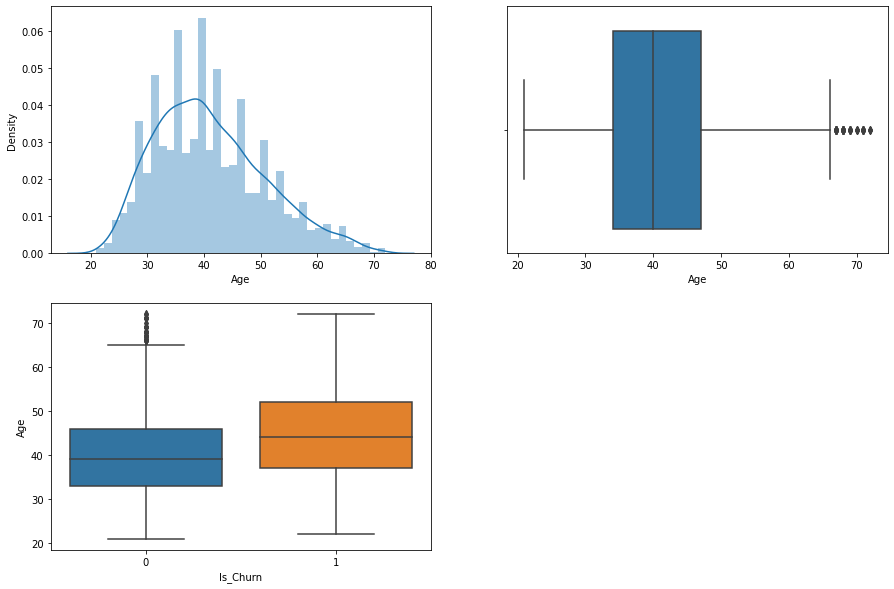

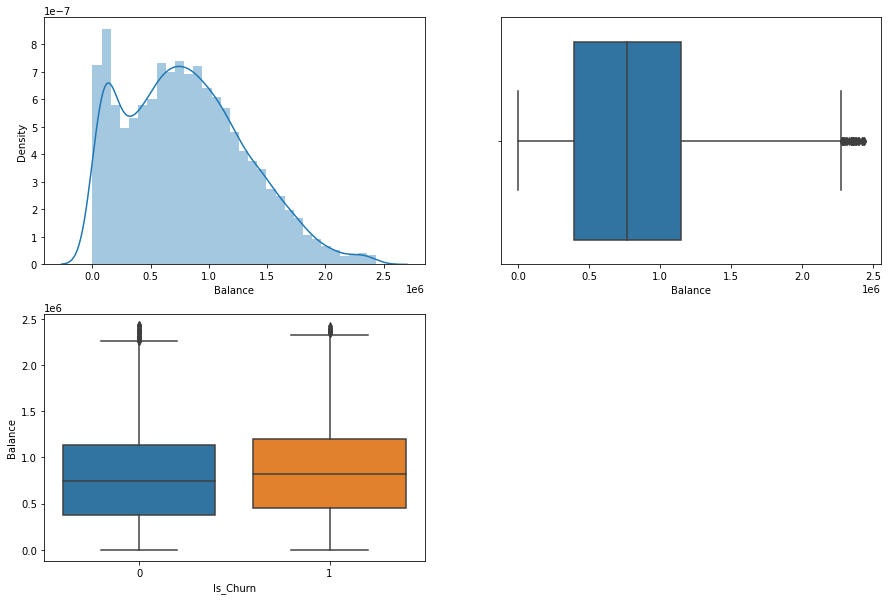

In [475]:
for i in num_cols:
    plt.figure(figsize=(15,10))
    
    ax1=plt.subplot(2,2,1)
    sns.distplot(data[i], ax=ax1)
    
    ax2=plt.subplot(2,2,2)
    sns.boxplot(data[i],ax=ax2)
    
    ax3= plt.subplot(2,2,3)
    sns.boxplot(y=i,x="Is_Churn",data=data,ax=ax3)
    
    plt.show()

In [476]:
### Checking the Churn Rate
churn = (sum(data['Is_Churn'])/len(data['Is_Churn'].index))*100
churn

23.112781954887218

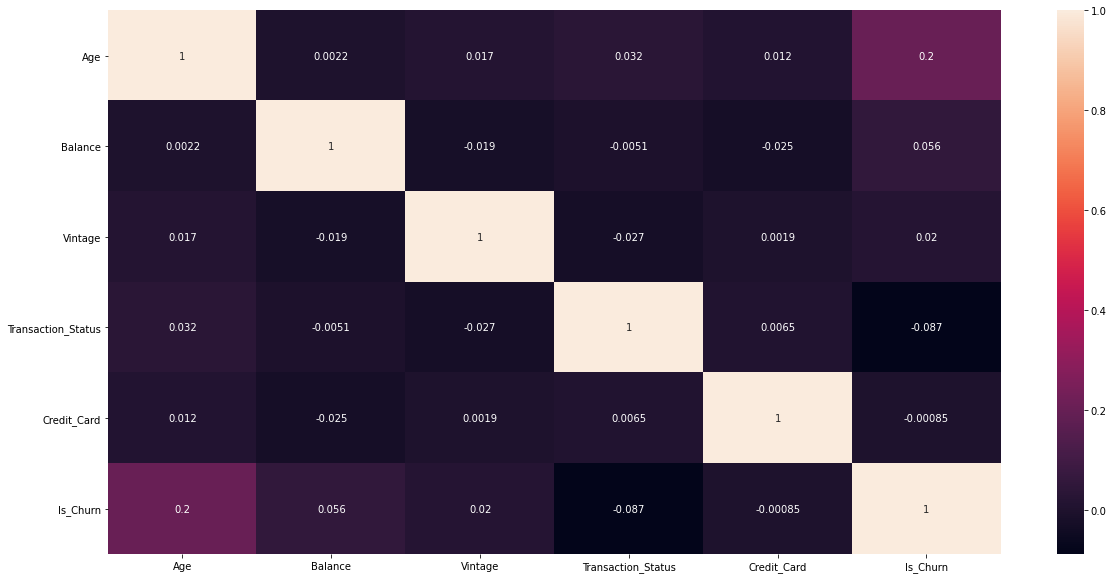

In [477]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

### Data Preparation

In [478]:
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [479]:
data.Age.describe()

count    6650.000000
mean       41.130226
std         9.685747
min        21.000000
25%        34.000000
50%        40.000000
75%        47.000000
max        72.000000
Name: Age, dtype: float64

In [480]:
q=[0,0.25,0.5,0.75,1.0]
data["Age"]=pd.qcut(data["Age"],q, ["Young","low-middle-age","high-middle-age","old"])

In [481]:
data.Age.value_counts()

Young              1843
low-middle-age     1668
old                1613
high-middle-age    1526
Name: Age, dtype: int64

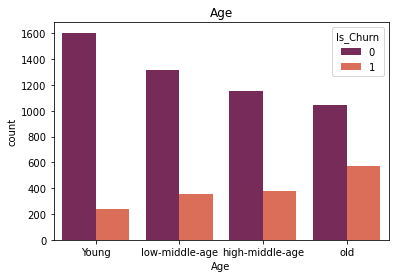

In [482]:
plt.title('Age')
sns.countplot(data.Age, hue=data.Is_Churn,palette="rocket")
plt.show()

In [483]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  6650 non-null   object  
 1   Age                 6650 non-null   category
 2   Gender              6650 non-null   object  
 3   Income              6650 non-null   object  
 4   Balance             6650 non-null   float64 
 5   Vintage             6650 non-null   int64   
 6   Transaction_Status  6650 non-null   int64   
 7   Product_Holdings    6650 non-null   object  
 8   Credit_Card         6650 non-null   int64   
 9   Credit_Category     6650 non-null   object  
 10  Is_Churn            6650 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(5)
memory usage: 526.3+ KB


In [484]:
data['Vintage']=data['Vintage'].astype(object)

In [485]:
cat_col=['Age','Gender','Income','Vintage','Product_Holdings','Credit_Category']

In [486]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[cat_col], drop_first=True)

data = pd.concat([data,dummy],1)

In [487]:
data.shape

(6650, 27)

In [488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    6650 non-null   object  
 1   Age                   6650 non-null   category
 2   Gender                6650 non-null   object  
 3   Income                6650 non-null   object  
 4   Balance               6650 non-null   float64 
 5   Vintage               6650 non-null   object  
 6   Transaction_Status    6650 non-null   int64   
 7   Product_Holdings      6650 non-null   object  
 8   Credit_Card           6650 non-null   int64   
 9   Credit_Category       6650 non-null   object  
 10  Is_Churn              6650 non-null   int64   
 11  Age_low-middle-age    6650 non-null   uint8   
 12  Age_high-middle-age   6650 non-null   uint8   
 13  Age_old               6650 non-null   uint8   
 14  Gender_Male           6650 non-null   uint8   
 15  Inco

In [489]:
#dropping the original columns after dummy variable creation
data.drop(cat_col,1,inplace = True)

In [490]:
data.head()

,ID,Balance,Transaction_Status,Credit_Card,Is_Churn,Age_low-middle-age,Age_high-middle-age,Age_old,Gender_Male,Income_5L - 10L,...,Income_More than 15L,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor
0,84e2fcc9,563266.44,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,57fea15e,875572.11,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,8df34ef3,701607.06,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
3,c5c0788b,1393922.16,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,951d69c4,893146.23,1,1,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [491]:
data.drop('ID',axis=1,inplace=True)

In [492]:
data.shape

(6650, 20)

In [493]:
# Putting feature variable to X
X_train = data.drop(['Is_Churn'], axis=1)

X_train.head()

,Balance,Transaction_Status,Credit_Card,Age_low-middle-age,Age_high-middle-age,Age_old,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor
0,563266.44,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,875572.11,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
2,701607.06,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,1393922.16,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,893146.23,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [494]:
# Putting response variable to y
y_train = data['Is_Churn']

y_train.head()

0    1
1    0
2    0
3    1
4    1
Name: Is_Churn, dtype: int64

## Logistric Regression

### Step 8: Feature Selection Using RFE

In [495]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [496]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=LogisticRegression(),n_features_to_select=15)          
# running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [497]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True])

In [498]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Balance', True, 1),
 ('Transaction_Status', True, 1),
 ('Credit_Card', True, 1),
 ('Age_low-middle-age', True, 1),
 ('Age_high-middle-age', True, 1),
 ('Age_old', False, 5),
 ('Gender_Male', True, 1),
 ('Income_5L - 10L', True, 1),
 ('Income_Less than 5L', True, 1),
 ('Income_More than 15L', True, 1),
 ('Vintage_1', True, 1),
 ('Vintage_2', True, 1),
 ('Vintage_3', True, 1),
 ('Vintage_4', False, 2),
 ('Vintage_5', False, 4),
 ('Product_Holdings_2', True, 1),
 ('Product_Holdings_3+', False, 3),
 ('Credit_Category_Good', True, 1),
 ('Credit_Category_Poor', True, 1)]

In [499]:
col = X_train.columns[rfe.support_]

In [500]:
X_train.columns[~rfe.support_]

Index(['Age_old', 'Vintage_4', 'Vintage_5', 'Product_Holdings_3+'], dtype='object')

##### Assessing the model with StatsModels

In [501]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Is_Churn   No. Observations:                 6650
Model:                            GLM   Df Residuals:                     6634
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3537.9
Date:                Sun, 13 Mar 2022   Deviance:                       7075.9
Time:                        22:24:36   Pearson chi2:                 6.66e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9960      0.119     -8.359      0.000      -1.230      -0.762
Balance               2.402e-07   5.75e-08      4.177      0.000    1.27e-07    3.53e-07
Transaction_Status      -0.4092      0.059     -6.943      0.000      -0.525      -0.294
Credit_Card              0.0056      0.062      0.090      0.928      -0.116       0.128
Age_low-middle-age      -0.1161      0.073     -1.596      0.110      -0.259       0.026
Age_high-middle-age      0.0746      0.072      1.029      0.303      -0.067       0.217
Gender_Male             -0.2553      0.059     -4.346      0.000      -0.370      -0.140
Income_5L - 10L         -0.0622      0.079     -0.791      0.429      -0.216       0.092
Income_Less than 5L     -0.0613      0.082     -0.747      0.455      -0.222       0.099
Income_More than 15L     0.0365      0.084      0.432      0.666      -0.129       0.202
Vintage_1                0.0656      0.080      0.824      0.410      -0.090       0.222
Vintage_2               -0.1299      0.083     -1.566      0.117      -0.293       0.033
Vintage_3                0.0529      0.079      0.672      0.502      -0.101       0.207
Product_Holdings_2      -0.0940      0.060     -1.562      0.118      -0.212       0.024
Credit_Category_Good    -0.1461      0.083     -1.757      0.079      -0.309       0.017
Credit_Category_Poor     0.0798      0.068      1.177      0.239      -0.053       0.213
========================================================================================
"""

As we can see that p-value of credit_Card varibale is too high. So let's drop it

In [502]:
#dropping variable with high VIF

col = col.drop('Credit_Card',1)

In [503]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Is_Churn   No. Observations:                 6650
Model:                            GLM   Df Residuals:                     6635
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3537.9
Date:                Sun, 13 Mar 2022   Deviance:                       7075.9
Time:                        22:24:36   Pearson chi2:                 6.66e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9921      0.111     -8.926      0.000      -1.210      -0.774
Balance               2.401e-07   5.75e-08      4.176      0.000    1.27e-07    3.53e-07
Transaction_Status      -0.4091      0.059     -6.943      0.000      -0.525      -0.294
Age_low-middle-age      -0.1160      0.073     -1.596      0.111      -0.259       0.026
Age_high-middle-age      0.0746      0.072      1.029      0.303      -0.067       0.217
Gender_Male             -0.2553      0.059     -4.347      0.000      -0.370      -0.140
Income_5L - 10L         -0.0621      0.079     -0.790      0.430      -0.216       0.092
Income_Less than 5L     -0.0613      0.082     -0.747      0.455      -0.222       0.099
Income_More than 15L     0.0366      0.084      0.434      0.664      -0.129       0.202
Vintage_1                0.0655      0.080      0.823      0.411      -0.091       0.221
Vintage_2               -0.1300      0.083     -1.568      0.117      -0.293       0.033
Vintage_3                0.0528      0.079      0.671      0.502      -0.101       0.207
Product_Holdings_2      -0.0939      0.060     -1.561      0.119      -0.212       0.024
Credit_Category_Good    -0.1462      0.083     -1.758      0.079      -0.309       0.017
Credit_Category_Poor     0.0797      0.068      1.175      0.240      -0.053       0.213
========================================================================================
"""

In [504]:
#dropping variable with high VIF

col = col.drop('Income_More than 15L',1)

In [505]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Is_Churn   No. Observations:                 6650
Model:                            GLM   Df Residuals:                     6636
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3538.0
Date:                Sun, 13 Mar 2022   Deviance:                       7076.1
Time:                        22:24:36   Pearson chi2:                 6.66e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9765      0.105     -9.289      0.000      -1.183      -0.770
Balance               2.402e-07   5.75e-08      4.178      0.000    1.28e-07    3.53e-07
Transaction_Status      -0.4092      0.059     -6.944      0.000      -0.525      -0.294
Age_low-middle-age      -0.1158      0.073     -1.592      0.111      -0.258       0.027
Age_high-middle-age      0.0742      0.072      1.025      0.306      -0.068       0.216
Gender_Male             -0.2555      0.059     -4.351      0.000      -0.371      -0.140
Income_5L - 10L         -0.0774      0.070     -1.103      0.270      -0.215       0.060
Income_Less than 5L     -0.0766      0.074     -1.037      0.300      -0.221       0.068
Vintage_1                0.0652      0.080      0.819      0.413      -0.091       0.221
Vintage_2               -0.1307      0.083     -1.576      0.115      -0.293       0.032
Vintage_3                0.0529      0.079      0.673      0.501      -0.101       0.207
Product_Holdings_2      -0.0941      0.060     -1.563      0.118      -0.212       0.024
Credit_Category_Good    -0.1459      0.083     -1.755      0.079      -0.309       0.017
Credit_Category_Poor     0.0796      0.068      1.174      0.240      -0.053       0.212
========================================================================================
"""

In [506]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.262225
1    0.213644
2    0.185714
3    0.270688
4    0.202986
5    0.170568
6    0.156421
7    0.391419
8    0.367067
9    0.323818
dtype: float64

In [507]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26222454, 0.21364446, 0.18571408, 0.27068762, 0.20298614,
       0.17056828, 0.15642058, 0.39141913, 0.36706656, 0.32381847])

In [508]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,1,0.262225,0
1,0,0.213644,1
2,0,0.185714,2
3,1,0.270688,3
4,1,0.202986,4


In [509]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
0,1,0.262225,0,0
1,0,0.213644,1,0
2,0,0.185714,2,0
3,1,0.270688,3,0
4,1,0.202986,4,0


In [510]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[5113    0]
 [1537    0]]


In [511]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.7688721804511278


In [512]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [513]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0

In [514]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [515]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Balance,2.65
12,Credit_Category_Poor,2.15
4,Gender_Male,2.02
1,Transaction_Status,1.91
10,Product_Holdings_2,1.74
11,Credit_Category_Good,1.57
5,Income_5L - 10L,1.49
9,Vintage_3,1.45
7,Vintage_1,1.44
2,Age_low-middle-age,1.42


In [516]:
#dropping variable with high VIF

col = col.drop('Vintage_3',1)

In [517]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Is_Churn   No. Observations:                 6650
Model:                            GLM   Df Residuals:                     6637
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3538.3
Date:                Sun, 13 Mar 2022   Deviance:                       7076.5
Time:                        22:24:37   Pearson chi2:                 6.66e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9584      0.102     -9.439      0.000      -1.157      -0.759
Balance               2.401e-07   5.75e-08      4.176      0.000    1.27e-07    3.53e-07
Transaction_Status      -0.4095      0.059     -6.948      0.000      -0.525      -0.294
Age_low-middle-age      -0.1153      0.073     -1.586      0.113      -0.258       0.027
Age_high-middle-age      0.0750      0.072      1.036      0.300      -0.067       0.217
Gender_Male             -0.2553      0.059     -4.347      0.000      -0.370      -0.140
Income_5L - 10L         -0.0774      0.070     -1.102      0.271      -0.215       0.060
Income_Less than 5L     -0.0768      0.074     -1.039      0.299      -0.222       0.068
Vintage_1                0.0462      0.074      0.622      0.534      -0.100       0.192
Vintage_2               -0.1496      0.078     -1.919      0.055      -0.302       0.003
Product_Holdings_2      -0.0937      0.060     -1.557      0.120      -0.212       0.024
Credit_Category_Good    -0.1455      0.083     -1.751      0.080      -0.308       0.017
Credit_Category_Poor     0.0803      0.068      1.185      0.236      -0.053       0.213
========================================================================================
"""

In [518]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.265839
1    0.213548
2    0.185783
3    0.274580
4    0.202935
5    0.173144
6    0.156327
7    0.396060
8    0.371414
9    0.316400
dtype: float64

In [519]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2658388 , 0.21354822, 0.18578253, 0.27457957, 0.202935  ,
       0.17314417, 0.1563269 , 0.39605956, 0.37141361, 0.31639959])

In [520]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [521]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
0,1,0.265839,0,0
1,0,0.213548,1,0
2,0,0.185783,2,0
3,1,0.274580,3,0
4,1,0.202935,4,0


In [522]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.7688721804511278


In [523]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[5113    0]
 [1537    0]]


## Decision Trees

In [524]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [525]:
dt = DecisionTreeClassifier(random_state=42)

In [526]:
# Hyper-parameter tuning for the Decision Tree
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [527]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [528]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 3.02 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [529]:
grid_search.best_score_

0.7688722047710741

In [530]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

In [531]:
plt.show()

In [532]:
y_train_pred = dt_best.predict(X_train)

In [533]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5113
           1       0.00      0.00      0.00      1537

    accuracy                           0.77      6650
   macro avg       0.38      0.50      0.43      6650
weighted avg       0.59      0.77      0.67      6650



### Decision Forest using SMOTE

In [534]:
from imblearn.over_sampling import SMOTE

In [535]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [536]:
dt = DecisionTreeClassifier(random_state=42)

In [537]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [538]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [539]:
grid_search.fit(X_train_oversampled, y_train_oversampled)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [540]:
grid_search.best_score_

0.7348094509349584

In [541]:
dt_best_smote= grid_search.best_estimator_

In [542]:
dt_best_smote.fit(X_train_oversampled, y_train_oversampled)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=20, random_state=42)

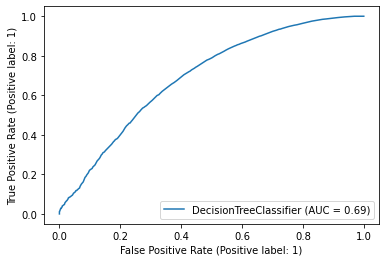

In [543]:
plot_roc_curve(dt_best_smote, X_train, y_train)
plt.show()

In [544]:
y_train_pred = dt_best_smote.predict(X_train)

In [545]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      5113
           1       0.39      0.32      0.35      1537

    accuracy                           0.73      6650
   macro avg       0.60      0.58      0.59      6650
weighted avg       0.71      0.73      0.72      6650



### Random Forest Classifier

In [546]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [547]:
# hyperparameter tuning using GridSearchCV

params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [548]:
rf = RandomForestClassifier(oob_score = True, random_state=23)
rcv = RandomizedSearchCV(rf, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=23)
rcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=23),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             500]},
                   random_state=23, scoring='accuracy', verbose=1)

In [549]:
rcv.best_score_

0.7705263157894737

In [550]:
rf_best= rcv.best_estimator_

In [551]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, oob_score=True,
                       random_state=23)

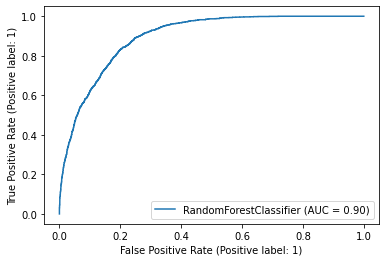

In [552]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [553]:
y_train_pred = rf_best.predict(X_train)

In [554]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5113
           1       0.92      0.09      0.16      1537

    accuracy                           0.79      6650
   macro avg       0.85      0.54      0.52      6650
weighted avg       0.82      0.79      0.71      6650



<font color =blue >Using the best parameters from above table Decision tree with smote sampling gives better precision and recall score along with better F1-score and good auc scores. Let's run both training algorithm on test data.

### Submission File

In [555]:
# Importing unseen datasets
test_data = pd.read_csv("test_lTY72QC.csv")
test_data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [556]:
test_data.shape

(2851, 10)

In [557]:
submission_data = test_data.set_index('ID')
submission_data.shape

(2851, 9)

In [558]:
q=[0,0.25,0.5,0.75,1.0]
submission_data["Age"]=pd.qcut(submission_data["Age"],q, ["Young","low-middle-age","high-middle-age","old"])

In [559]:
submission_data['Vintage']=submission_data['Vintage'].astype(object)

In [560]:
submission_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2851 entries, 55480787 to 36b81f59
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 2851 non-null   category
 1   Gender              2851 non-null   object  
 2   Income              2851 non-null   object  
 3   Balance             2851 non-null   float64 
 4   Vintage             2851 non-null   object  
 5   Transaction_Status  2851 non-null   int64   
 6   Product_Holdings    2851 non-null   object  
 7   Credit_Card         2851 non-null   int64   
 8   Credit_Category     2851 non-null   object  
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 203.4+ KB


In [561]:
cat_col

['Age', 'Gender', 'Income', 'Vintage', 'Product_Holdings', 'Credit_Category']

In [562]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy1 = pd.get_dummies(submission_data[cat_col], drop_first=True)

submission_data = pd.concat([submission_data,dummy1],1)

In [563]:
submission_data.shape

(2851, 25)

In [564]:
submission_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2851 entries, 55480787 to 36b81f59
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   2851 non-null   category
 1   Gender                2851 non-null   object  
 2   Income                2851 non-null   object  
 3   Balance               2851 non-null   float64 
 4   Vintage               2851 non-null   object  
 5   Transaction_Status    2851 non-null   int64   
 6   Product_Holdings      2851 non-null   object  
 7   Credit_Card           2851 non-null   int64   
 8   Credit_Category       2851 non-null   object  
 9   Age_low-middle-age    2851 non-null   uint8   
 10  Age_high-middle-age   2851 non-null   uint8   
 11  Age_old               2851 non-null   uint8   
 12  Gender_Male           2851 non-null   uint8   
 13  Income_5L - 10L       2851 non-null   uint8   
 14  Income_Less than 5L   2851 non-null   uint8   
 15

In [565]:
submission_data.drop(cat_col,1,inplace=True)

In [566]:
submission_data.shape

(2851, 19)

In [567]:
# We ll go for decsion tree as it has the lowest RMSE
test_data["Is_Churn"] = dt_best_smote.predict(submission_data)
output = test_data[['ID','Is_Churn']]
output.head()

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,1
3,b3256702,0
4,dc28adb5,0


In [568]:
output.to_csv('submission_DecisionTree_hyper_smote.csv',index=False)